In [79]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [80]:
# Read CSV file with Stock Tickers for all stocks under the Energy and Utilities
file_path = 'infrastructure_stocks.csv'

In [81]:
stocks_df = pd.read_csv(file_path)

# Plotting Sector Comparison For Top Three Stocks By Market Value

- Determine the stocks for the three major sectors (utilities, industrial and energy)

- Extract the ticker for the largest stock by market value for each 

- Largest stock by market value for a given sector is used to represent said sector

In [82]:
stocks_df['Sector'].unique()

array(['Industrials', 'Energy', 'Utilities', 'Cash and/or Derivatives'],
      dtype=object)

In [83]:
utilities_df = stocks_df.loc[stocks_df['Sector']=='Utilities']

utilities_df

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,"140,259,544.60",4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,"112,384,023.75",3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
5,DUK,DUKE ENERGY CORP,Utilities,Equity,"108,327,231.36",3.16,"108,327,231.36","1,221,552.00",88.68,United States,New York Stock Exchange Inc.,USD,1.00
8,IBE,IBERDROLA SA,Utilities,Equity,"103,905,552.39",3.03,"103,905,552.39","9,306,288.00",11.17,Spain,Bolsa De Madrid,USD,0.95
15,ENEL,ENEL,Utilities,Equity,"74,952,046.33",2.19,"74,952,046.33","12,259,357.00",6.11,Italy,Borsa Italiana,USD,0.95
16,NG.,NATIONAL GRID PLC,Utilities,Equity,"72,501,017.60",2.12,"72,501,017.60","6,150,584.00",11.79,United Kingdom,London Stock Exchange,USD,0.82
19,SRE,SEMPRA,Utilities,Equity,"67,609,656.18",1.97,"67,609,656.18","997,634.00",67.77,United States,New York Stock Exchange Inc.,USD,1.00
21,AEP,AMERICAN ELECTRIC POWER INC,Utilities,Equity,"60,818,565.66",1.77,"60,818,565.66","814,498.00",74.67,United States,NASDAQ,USD,1.00
23,EXC,EXELON CORP,Utilities,Equity,"59,751,305.92",1.74,"59,751,305.92","1,577,384.00",37.88,United States,NASDAQ,USD,1.00
24,D,DOMINION ENERGY INC,Utilities,Equity,"58,300,509.26",1.70,"58,300,509.26","1,320,809.00",44.14,United States,New York Stock Exchange Inc.,USD,1.00


In [84]:
top_utility_ticker = utilities_df.loc[utilities_df['Weight (%)'] == utilities_df['Weight (%)'].max()]['Ticker']
top_utility_ticker

3    NEE
Name: Ticker, dtype: object

In [85]:
energy_df = stocks_df.loc[stocks_df['Sector']=='Energy']
energy_df

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
1,ENB,ENBRIDGE INC,Energy,Equity,"166,198,806.02",4.85,"166,198,806.02","4,955,309.00",33.54,Canada,Toronto Stock Exchange,USD,1.35
9,LNG,CHENIERE ENERGY INC,Energy,Equity,"102,803,368.80",3.00,"102,803,368.80","608,520.00",168.94,United States,Nyse Mkt Llc,USD,1.00
10,WMB,WILLIAMS INC,Energy,Equity,"102,564,992.34",2.99,"102,564,992.34","2,980,674.00",34.41,United States,New York Stock Exchange Inc.,USD,1.00
12,TRP,TC ENERGY CORP,Energy,Equity,"86,201,206.99",2.52,"86,201,206.99","2,490,903.00",34.61,Canada,Toronto Stock Exchange,USD,1.35
13,KMI,KINDER MORGAN INC,Energy,Equity,"80,711,022.31",2.36,"80,711,022.31","4,841,693.00",16.67,United States,New York Stock Exchange Inc.,USD,1.00
18,OKE,ONEOK INC,Energy,Equity,"70,993,228.95",2.07,"70,993,228.95","1,094,055.00",64.89,United States,New York Stock Exchange Inc.,USD,1.00
29,TRGP,TARGA RESOURCES CORP,Energy,Equity,"48,439,836.32",1.41,"48,439,836.32","553,978.00",87.44,United States,New York Stock Exchange Inc.,USD,1.00
34,PPL,PEMBINA PIPELINE CORP,Energy,Equity,"40,774,646.12",1.19,"40,774,646.12","1,350,235.00",30.20,Canada,Toronto Stock Exchange,USD,1.35
50,KEY,KEYERA CORP,Energy,Equity,"13,293,635.35",0.39,"13,293,635.35","559,672.00",23.75,Canada,Toronto Stock Exchange,USD,1.35
51,DTM,DT MIDSTREAM INC,Energy,Equity,"12,612,079.80",0.37,"12,612,079.80","236,580.00",53.31,United States,New York Stock Exchange Inc.,USD,1.00


In [86]:
top_energy_ticker = energy_df.loc[energy_df['Weight (%)'] == energy_df['Weight (%)'].max()]['Ticker']
top_energy_ticker

1    ENB
Name: Ticker, dtype: object

In [87]:
industrials_df = stocks_df.loc[stocks_df['Sector']=='Industrials']
industrials_df

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
0,AENA,AENA SME SA,Industrials,Equity,"172,110,531.19",5.02,"172,110,531.19","1,160,108.00",148.36,Spain,Bolsa De Madrid,USD,0.95
2,TCL,TRANSURBAN GROUP STAPLED UNITS,Industrials,Equity,"156,249,185.33",4.56,"156,249,185.33","19,173,993.00",8.15,Australia,Asx - All Markets,USD,1.56
6,GET,GETLINK,Industrials,Equity,"104,791,367.01",3.06,"104,791,367.01","6,624,779.00",15.82,France,Nyse Euronext - Euronext Paris,USD,0.95
7,PAC,GRUPO AEROPORTUARIO DEL PACIFICO A,Industrials,Equity,"104,436,750.76",3.05,"104,436,750.76","597,601.00",174.76,Mexico,New York Stock Exchange Inc.,USD,1.00
11,AIA,AUCKLAND INTERNATIONAL AIRPORT LTD,Industrials,Equity,"93,305,554.25",2.72,"93,305,554.25","19,927,708.00",4.68,New Zealand,New Zealand Exchange Ltd,USD,1.68
14,ASR,GRUPO AEROPORTUARIO ADR REPRESENTI,Industrials,Equity,"79,841,146.80",2.33,"79,841,146.80","310,920.00",256.79,Mexico,New York Stock Exchange Inc.,USD,1.00
17,ALX,ATLAS ARTERIA STAPLED UNITS,Industrials,Equity,"72,342,024.69",2.11,"72,342,024.69","20,112,597.00",3.60,Australia,Asx - All Markets,USD,1.56
20,9706,JAPAN AIRPORT TERMINAL LTD,Industrials,Equity,"64,090,104.09",1.87,"64,090,104.09","1,539,100.00",41.64,Japan,Tokyo Stock Exchange,USD,149.40
22,FHZN,FLUGHAFEN ZUERICH AG,Industrials,Equity,"59,846,331.90",1.75,"59,846,331.90","314,339.00",190.39,Switzerland,SIX Swiss Exchange,USD,0.92
25,ADP,AEROPORTS DE PARIS SA,Industrials,Equity,"53,619,702.23",1.56,"53,619,702.23","456,902.00",117.36,France,Nyse Euronext - Euronext Paris,USD,0.95


In [88]:
top_industrial_ticker = industrials_df.loc[industrials_df['Weight (%)'] == industrials_df['Weight (%)'].max()]['Ticker']
top_industrial_ticker

0    AENA
Name: Ticker, dtype: object

In [89]:
top_tickers_all_sectors = [top_industrial_ticker[0] + ".MC", top_energy_ticker[1], top_utility_ticker[3]]
top_stocks_all = yf.Tickers(top_tickers_all_sectors)
top_hist_all = top_stocks_all.history(period='12mo')
top_close_all = top_hist_all['Close']
top_close_all.dropna()

[*********************100%%**********************]  3 of 3 completed


,AENA.MC,ENB,NEE
Date,,,
2022-10-07,101.980301,34.648888,74.850067
2022-10-10,101.883408,34.050365,74.859825
2022-10-11,100.284660,33.694996,74.167213
2022-10-12,99.945534,33.311565,70.967583
2022-10-13,101.156708,34.723705,71.299232
...,...,...,...
2023-10-02,141.000000,31.990000,52.150002
2023-10-03,138.199997,31.570000,52.779999
2023-10-04,138.550003,31.379999,50.619999


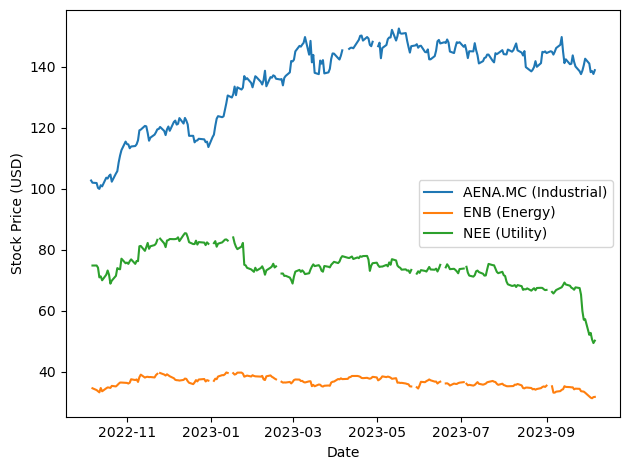

In [90]:
plt.plot(top_close_all['AENA.MC'].index, top_close_all['AENA.MC'], label='AENA.MC (Industrial)')
plt.plot(top_close_all['ENB'].index, top_close_all['ENB'], label='ENB (Energy)')
plt.plot(top_close_all['NEE'].index, top_close_all['NEE'], label='NEE (Utility)')
plt.legend(loc="right")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.tight_layout()

plt.savefig('./output_files/topsectorstockanalysis.png')

Given the trends observed, we can see that the top industrial stock is trending upwards while the energy and utility stocks are trending downwards.

# 

# Top 3 / Bottom 3  Energy Analysis

In [91]:
# Find the top three US energy stocks based on market value
top_energy_tickers = ['LNG', 'WMB', 'KMI' ]

# Get historical data with the energy tickers 
e_stocks = yf.Tickers(top_energy_tickers)

# Determine the previous 12 months of data 
energy_hist = e_stocks.history(period='12mo')

# Find the closing price 
top_close = energy_hist['Close']

top_close

[*********************100%%**********************]  3 of 3 completed


,KMI,LNG,WMB
Date,,,
2022-10-07,16.186007,172.258057,28.190649
2022-10-10,16.026403,166.209198,27.774273
2022-10-11,16.110899,166.456696,28.152798
2022-10-12,16.007624,169.891953,27.783737
2022-10-13,16.561552,176.386292,28.777365
...,...,...,...
2023-10-02,16.160000,162.529999,32.930000
2023-10-03,16.100000,162.610001,32.970001
2023-10-04,16.030001,158.949997,32.930000


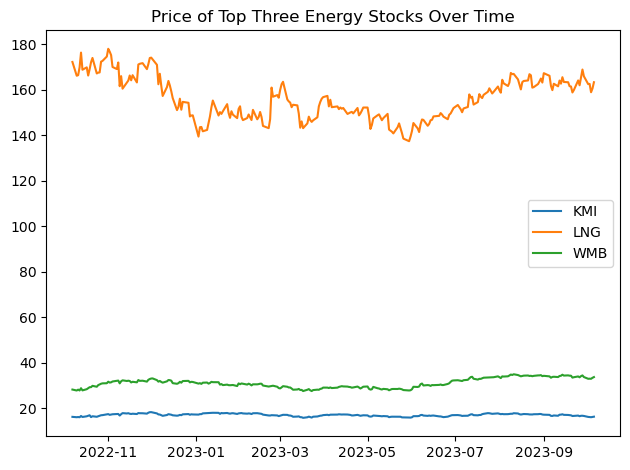

In [92]:
plt.plot(top_close['KMI'].index, top_close['KMI'], label='KMI')
plt.plot(top_close['LNG'].index, top_close['LNG'], label='LNG')
plt.plot(top_close['WMB'].index, top_close['WMB'], label='WMB')
plt.legend(loc="right")
plt.title("Price of Top Three Energy Stocks Over Time")
plt.tight_layout()

plt.savefig('./output_files/topenergystocksovertime.png')

# Statistical Analysis 

We want to determine if a energy and utilities stock are correlated. We will isolate the data, determine the relative percentage changes and then calculate the p-value that will determine if we either reject or fail to reject the null hypothesis.

- **Null Hypothesis**: There is no significant difference between the daily percentage change for the energy and utilities stock.

- **Altenative Hypothesis**: There is a significant difference between the daily percentage change for the energy and utilities stocks.

In [93]:
# Stocks to determine correlation
stat_stocks = ['ENB', 'NEE']

# Get historical data with the stocks we want to calculate the correlation
stat_stocks_df = yf.Tickers(stat_stocks).history(period="12mo")["Close"]

stat_stocks_df

[*********************100%%**********************]  2 of 2 completed


,ENB,NEE
Date,,
2022-10-07,34.648891,74.850067
2022-10-10,34.050362,74.859818
2022-10-11,33.694988,74.167213
2022-10-12,33.311562,70.967575
2022-10-13,34.723705,71.299240
...,...,...
2023-10-02,31.990000,52.150002
2023-10-03,31.570000,52.779999
2023-10-04,31.379999,50.619999


In [94]:
for stock in stat_stocks:
    if stock == 'ENB':
        enb_column = stat_stocks_df['ENB']
        daily_enb = enb_column.pct_change()*100
    elif stock == 'NEE':
        nee_column = stat_stocks_df['NEE']
        daily_nee = nee_column.pct_change()*100

In [95]:
stat_pct_changes_df = pd.DataFrame({
                            'ENB % Changes': daily_enb,
                            'NEE % Changes': daily_nee
})

stat_pct_changes_df = stat_pct_changes_df.dropna()

stat_pct_changes_df = stat_pct_changes_df.reset_index()

stat_pct_changes_df

,Date,ENB % Changes,NEE % Changes
0,2022-10-10,-1.727414,0.013027
1,2022-10-11,-1.043670,-0.925201
2,2022-10-12,-1.137934,-4.314087
3,2022-10-13,4.239200,0.467347
4,2022-10-14,-3.097232,-1.805981
...,...,...,...
245,2023-10-02,-3.615544,-8.971896
246,2023-10-03,-1.312911,1.208048
247,2023-10-04,-0.601839,-4.092459
248,2023-10-05,1.179098,-2.311336


In [96]:
import scipy.stats as st 

enb_changes = stat_pct_changes_df['ENB % Changes']
nee_changes = stat_pct_changes_df['NEE % Changes']

statistic_1, p_value_1 = st.ttest_ind(enb_changes, nee_changes)

print("The p_value for this statistical test is:", p_value_1)

The p_value for this statistical test is: 0.38625437221827663


In [97]:
statistic_2, p_value_2 = st.f_oneway(enb_changes, nee_changes)

print("The p_value for this second statistical test is:", p_value_2)

The p_value for this second statistical test is: 0.3862543722182712


Based on the p-value computed, we can determine that the stocks for each sector (energy and utilities) are not correlated. 

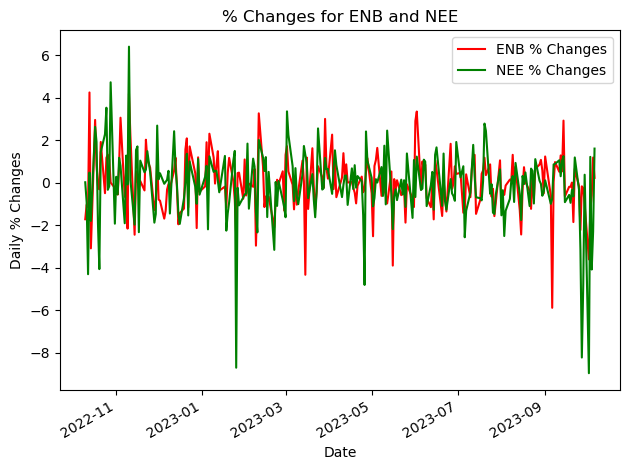

In [98]:
ax1 = stat_pct_changes_df.plot(kind='line', x='Date', y='ENB % Changes', color='r')    
ax2 = stat_pct_changes_df.plot(kind='line', x='Date', y='NEE % Changes', color='g', ax=ax1)    

plt.ylabel("Daily % Changes")
plt.title("% Changes for ENB and NEE")
plt.tight_layout()

plt.savefig('./output_files/ENBandNEEpercentagechanges.png')

In [99]:
stat_pct_changes_df

,Date,ENB % Changes,NEE % Changes
0,2022-10-10,-1.727414,0.013027
1,2022-10-11,-1.043670,-0.925201
2,2022-10-12,-1.137934,-4.314087
3,2022-10-13,4.239200,0.467347
4,2022-10-14,-3.097232,-1.805981
...,...,...,...
245,2023-10-02,-3.615544,-8.971896
246,2023-10-03,-1.312911,1.208048
247,2023-10-04,-0.601839,-4.092459
248,2023-10-05,1.179098,-2.311336


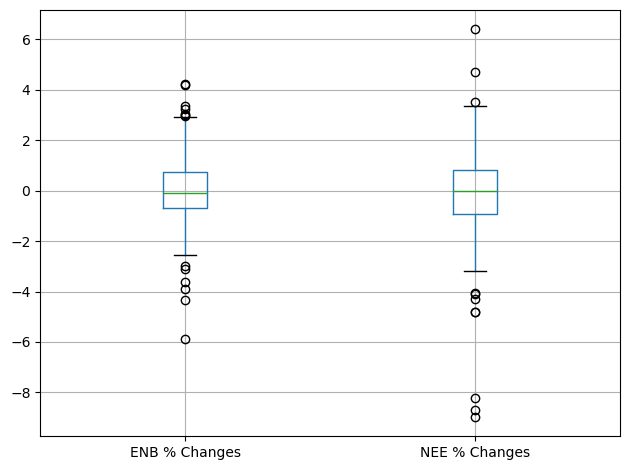

In [100]:
percentage_changes_box_whisker = stat_pct_changes_df.boxplot()
plt.tight_layout()
plt.savefig('./output_files/percentage_changes_box_whisker.png')

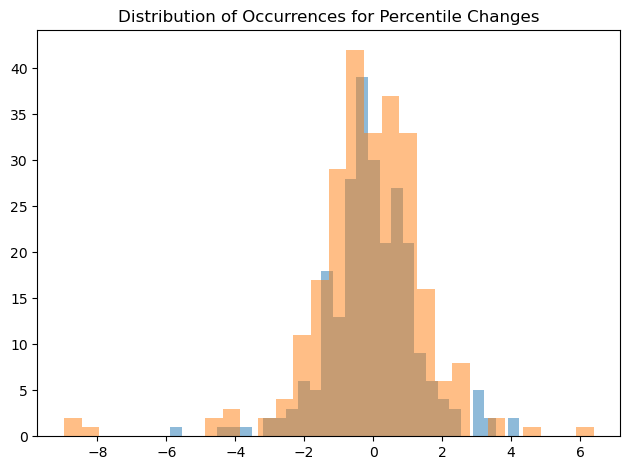

In [101]:
plt.hist(stat_pct_changes_df['ENB % Changes'], alpha=0.5, bins=30)
plt.hist(stat_pct_changes_df['NEE % Changes'], alpha=0.5, bins=30)
plt.title("Distribution of Occurrences for Percentile Changes")
plt.tight_layout()
plt.savefig('./output_files/distribution_occurrences_percentile_changes.png')

# Bar Chart - Country Analysis

In [102]:
# American Stock Performance 
american_df = stocks_df.loc[stocks_df['Location']=='United States']
american_df

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,"140,259,544.60",4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,"112,384,023.75",3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
5,DUK,DUKE ENERGY CORP,Utilities,Equity,"108,327,231.36",3.16,"108,327,231.36","1,221,552.00",88.68,United States,New York Stock Exchange Inc.,USD,1.00
9,LNG,CHENIERE ENERGY INC,Energy,Equity,"102,803,368.80",3.00,"102,803,368.80","608,520.00",168.94,United States,Nyse Mkt Llc,USD,1.00
10,WMB,WILLIAMS INC,Energy,Equity,"102,564,992.34",2.99,"102,564,992.34","2,980,674.00",34.41,United States,New York Stock Exchange Inc.,USD,1.00
13,KMI,KINDER MORGAN INC,Energy,Equity,"80,711,022.31",2.36,"80,711,022.31","4,841,693.00",16.67,United States,New York Stock Exchange Inc.,USD,1.00
18,OKE,ONEOK INC,Energy,Equity,"70,993,228.95",2.07,"70,993,228.95","1,094,055.00",64.89,United States,New York Stock Exchange Inc.,USD,1.00
19,SRE,SEMPRA,Utilities,Equity,"67,609,656.18",1.97,"67,609,656.18","997,634.00",67.77,United States,New York Stock Exchange Inc.,USD,1.00
21,AEP,AMERICAN ELECTRIC POWER INC,Utilities,Equity,"60,818,565.66",1.77,"60,818,565.66","814,498.00",74.67,United States,NASDAQ,USD,1.00
23,EXC,EXELON CORP,Utilities,Equity,"59,751,305.92",1.74,"59,751,305.92","1,577,384.00",37.88,United States,NASDAQ,USD,1.00


In [103]:
american_stock_tickers = [ticker for ticker in american_df['Ticker']]
american_ticker_data = yf.Tickers(american_stock_tickers)
american_ticker_history = american_ticker_data.history(period='12mo')
american_ticker_close = american_ticker_history['Close']
american_ticker_close

[*********************100%%**********************]  24 of 24 completed


2 Failed downloads:
['SGAFT', 'XTSLA']: Exception('%ticker%: No data found, symbol may be delisted')


,AEP,AWK,D,DTM,DUK,ED,EIX,ES,ETRN,EXC,...,PCG,PEG,SGAFT,SO,SRE,TRGP,WEC,WMB,XEL,XTSLA
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-07,79.900269,125.089600,61.235512,51.280846,85.413315,78.774559,56.100948,71.613281,7.275785,35.697395,...,14.93,53.281284,NaN,61.566460,69.523544,62.332832,82.648056,28.190649,57.969368,NaN
2022-10-10,81.305908,125.079788,61.340126,50.512627,85.490036,78.687645,55.354584,72.307709,7.137986,36.518364,...,14.13,53.367962,NaN,61.441639,69.769424,61.932068,82.474022,27.774273,58.308315,NaN
2022-10-11,81.710281,125.354607,61.653957,50.967876,85.854431,78.793861,54.981407,71.786896,7.239038,36.189976,...,14.22,53.098286,NaN,61.105576,69.490448,64.365959,82.357986,28.152798,57.940319,NaN
2022-10-12,78.696815,123.676270,59.590267,50.797157,82.440590,76.737106,53.163372,69.221344,7.358464,34.731560,...,14.07,51.509094,NaN,59.050804,66.530373,63.378712,79.505722,27.783735,56.110012,NaN
2022-10-13,81.623634,126.591255,61.853676,51.849899,84.377655,79.324951,54.445568,71.140678,7.588130,35.958172,...,14.31,52.944176,NaN,61.499252,67.632118,66.838936,81.913231,28.777363,57.853161,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,71.839996,119.750000,42.310001,51.639999,85.440002,81.620003,61.040001,55.730000,9.190000,36.610001,...,15.22,54.689999,NaN,62.709999,65.269997,83.430000,77.029999,32.930000,55.029999,NaN
2023-10-03,72.809998,117.000000,42.470001,51.470001,85.760002,83.180000,61.230000,56.049999,8.970000,37.049999,...,15.33,55.529999,NaN,64.029999,66.339996,82.070000,78.239998,32.970001,55.840000,NaN
2023-10-04,73.290001,119.349998,41.970001,52.200001,86.120003,84.199997,61.230000,56.110001,9.290000,37.410000,...,15.18,56.119999,NaN,64.620003,66.489998,79.230003,79.220001,32.930000,56.630001,NaN


In [104]:
del american_ticker_close['SGAFT']
del american_ticker_close['XTSLA']

american_ticker_close

,AEP,AWK,D,DTM,DUK,ED,EIX,ES,ETRN,EXC,...,NEE,OKE,PCG,PEG,SO,SRE,TRGP,WEC,WMB,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-07,79.900269,125.089600,61.235512,51.280846,85.413315,78.774559,56.100948,71.613281,7.275785,35.697395,...,74.850060,51.423775,14.93,53.281284,61.566460,69.523544,62.332832,82.648056,28.190649,57.969368
2022-10-10,81.305908,125.079788,61.340126,50.512627,85.490036,78.687645,55.354584,72.307709,7.137986,36.518364,...,74.859818,50.254417,14.13,53.367962,61.441639,69.769424,61.932068,82.474022,27.774273,58.308315
2022-10-11,81.710281,125.354607,61.653957,50.967876,85.854431,78.793861,54.981407,71.786896,7.239038,36.189976,...,74.167213,50.537327,14.22,53.098286,61.105576,69.490448,64.365959,82.357986,28.152798,57.940319
2022-10-12,78.696815,123.676270,59.590267,50.797157,82.440590,76.737106,53.163372,69.221344,7.358464,34.731560,...,70.967575,50.414730,14.07,51.509094,59.050804,66.530373,63.378712,79.505722,27.783735,56.110012
2022-10-13,81.623634,126.591255,61.853676,51.849899,84.377655,79.324951,54.445568,71.140678,7.588130,35.958172,...,71.299240,52.508270,14.31,52.944176,61.499252,67.632118,66.838936,81.913231,28.777363,57.853161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,71.839996,119.750000,42.310001,51.639999,85.440002,81.620003,61.040001,55.730000,9.190000,36.610001,...,52.150002,61.849998,15.22,54.689999,62.709999,65.269997,83.430000,77.029999,32.930000,55.029999
2023-10-03,72.809998,117.000000,42.470001,51.470001,85.760002,83.180000,61.230000,56.049999,8.970000,37.049999,...,52.779999,61.980000,15.33,55.529999,64.029999,66.339996,82.070000,78.239998,32.970001,55.840000
2023-10-04,73.290001,119.349998,41.970001,52.200001,86.120003,84.199997,61.230000,56.110001,9.290000,37.410000,...,50.619999,61.349998,15.18,56.119999,64.620003,66.489998,79.230003,79.220001,32.930000,56.630001


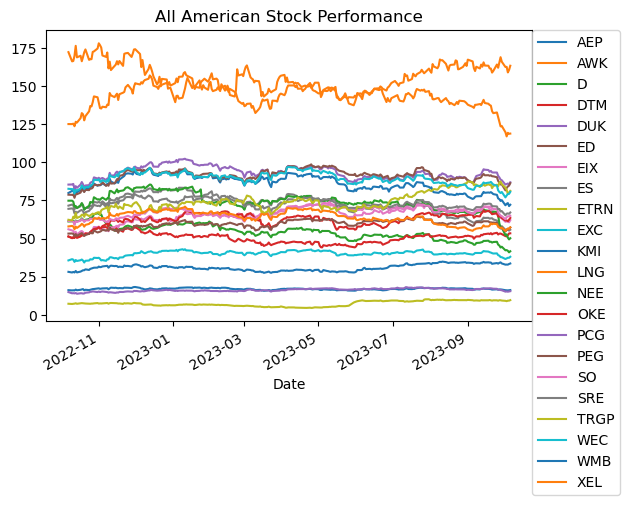

In [105]:
american_ticker_close.plot() 
plt.title("All American Stock Performance")
plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('./output_files/american_stock_performance.png')

In [106]:
stocks_df_2 = pd.read_csv(file_path)
stocks_df_2

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
0,AENA,AENA SME SA,Industrials,Equity,"172,110,531.19",5.02,"172,110,531.19","1,160,108.00",148.36,Spain,Bolsa De Madrid,USD,0.95
1,ENB,ENBRIDGE INC,Energy,Equity,"166,198,806.02",4.85,"166,198,806.02","4,955,309.00",33.54,Canada,Toronto Stock Exchange,USD,1.35
2,TCL,TRANSURBAN GROUP STAPLED UNITS,Industrials,Equity,"156,249,185.33",4.56,"156,249,185.33","19,173,993.00",8.15,Australia,Asx - All Markets,USD,1.56
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,"140,259,544.60",4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,"112,384,023.75",3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NOK,NOK CASH,Cash and/or Derivatives,Cash,"90,609.13",0.00,"90,609.13","973,260.00",9.31,Norway,--,USD,10.74
92,DJEZ3,DOW JONES US REAL ESTATE DEC 23,Cash and/or Derivatives,Futures,0.00,0.00,"3,640,800.00",120.00,303.40,--,Chicago Board Of Trade,USD,1.00
93,IBV3,IBEX 35 INDEX OCT 23,Cash and/or Derivatives,Futures,0.00,0.00,"4,385,913.93",44.00,"9,967.99",--,Meff Renta Variable,USD,0.95
94,XPZ3,SPI 200 DEC 23,Cash and/or Derivatives,Futures,0.00,0.00,"4,747,459.29",42.00,"4,521.38",--,Asx - Trade24,USD,1.56


In [107]:
# Unique Countries 
stocks_df_2['Location'].unique()

array(['Spain', 'Canada', 'Australia', 'United States', 'France',
       'Mexico', 'New Zealand', 'Italy', 'United Kingdom', 'Japan',
       'Switzerland', 'Germany', 'China', 'Singapore', 'Brazil',
       'Argentina', 'Belgium', 'Norway', 'Hong Kong', 'European Union',
       'Korea (South)', 'Denmark', '--'], dtype=object)

In [108]:
stocks_df_2.dtypes

Ticker             object
Name               object
Sector             object
Asset Class        object
Market Value       object
Weight (%)        float64
Notional Value     object
Shares             object
Price              object
Location           object
Exchange           object
Currency           object
FX Rate            object
dtype: object

In [109]:
stocks_df_2['Market Value'] = (stocks_df_2['Market Value'].str.split()).apply(lambda x: float(x[0].replace(',', '')))

stocks_df_2

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
0,AENA,AENA SME SA,Industrials,Equity,1.721105e+08,5.02,"172,110,531.19","1,160,108.00",148.36,Spain,Bolsa De Madrid,USD,0.95
1,ENB,ENBRIDGE INC,Energy,Equity,1.661988e+08,4.85,"166,198,806.02","4,955,309.00",33.54,Canada,Toronto Stock Exchange,USD,1.35
2,TCL,TRANSURBAN GROUP STAPLED UNITS,Industrials,Equity,1.562492e+08,4.56,"156,249,185.33","19,173,993.00",8.15,Australia,Asx - All Markets,USD,1.56
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,1.402595e+08,4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,1.123840e+08,3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NOK,NOK CASH,Cash and/or Derivatives,Cash,9.060913e+04,0.00,"90,609.13","973,260.00",9.31,Norway,--,USD,10.74
92,DJEZ3,DOW JONES US REAL ESTATE DEC 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"3,640,800.00",120.00,303.40,--,Chicago Board Of Trade,USD,1.00
93,IBV3,IBEX 35 INDEX OCT 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"4,385,913.93",44.00,"9,967.99",--,Meff Renta Variable,USD,0.95
94,XPZ3,SPI 200 DEC 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"4,747,459.29",42.00,"4,521.38",--,Asx - Trade24,USD,1.56


In [110]:
# What will determine the performance of some countries
stock_gb = stocks_df_2.groupby('Location')
stock_distribution = stock_gb['Market Value'].sum()

In [111]:
stock_distribution

Location
--                0.000000e+00
Argentina         6.640693e+06
Australia         2.935643e+08
Belgium           6.195596e+06
Brazil            2.651008e+07
Canada            3.267077e+08
China             1.584107e+08
Denmark           1.192185e+05
European Union    1.646516e+06
France            2.096989e+08
Germany           7.124734e+07
Hong Kong         1.707627e+06
Italy             9.036624e+07
Japan             6.433305e+07
Korea (South)     1.633713e+06
Mexico            2.376057e+08
New Zealand       9.406388e+07
Norway            6.015729e+06
Singapore         4.931231e+07
Spain             2.760161e+08
Switzerland       6.006453e+07
United Kingdom    7.268345e+07
United States     1.372733e+09
Name: Market Value, dtype: float64

In [112]:
stock_countries = list(stock_distribution.index)

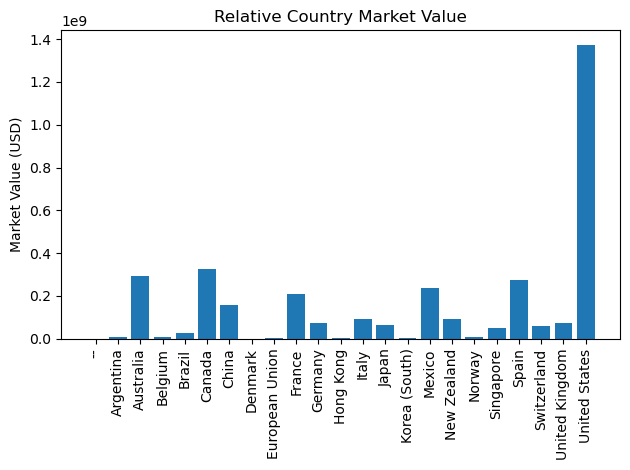

In [113]:
plt.bar(height=stock_distribution, x=stock_countries)
plt.xticks(rotation=90)
plt.title('Relative Country Market Value')
plt.ylabel('Market Value (USD)')
plt.tight_layout()

plt.savefig('./output_files/country_market_value.png')

In [114]:
stocks_df_2

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
0,AENA,AENA SME SA,Industrials,Equity,1.721105e+08,5.02,"172,110,531.19","1,160,108.00",148.36,Spain,Bolsa De Madrid,USD,0.95
1,ENB,ENBRIDGE INC,Energy,Equity,1.661988e+08,4.85,"166,198,806.02","4,955,309.00",33.54,Canada,Toronto Stock Exchange,USD,1.35
2,TCL,TRANSURBAN GROUP STAPLED UNITS,Industrials,Equity,1.562492e+08,4.56,"156,249,185.33","19,173,993.00",8.15,Australia,Asx - All Markets,USD,1.56
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,1.402595e+08,4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,1.123840e+08,3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NOK,NOK CASH,Cash and/or Derivatives,Cash,9.060913e+04,0.00,"90,609.13","973,260.00",9.31,Norway,--,USD,10.74
92,DJEZ3,DOW JONES US REAL ESTATE DEC 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"3,640,800.00",120.00,303.40,--,Chicago Board Of Trade,USD,1.00
93,IBV3,IBEX 35 INDEX OCT 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"4,385,913.93",44.00,"9,967.99",--,Meff Renta Variable,USD,0.95
94,XPZ3,SPI 200 DEC 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"4,747,459.29",42.00,"4,521.38",--,Asx - Trade24,USD,1.56


# Pie Chart - Performance By Sector

In [115]:
# What will determine the performance of some countries
sector_gb = stocks_df_2.groupby('Sector')
sector_distribution = sector_gb['Market Value'].sum()
del sector_distribution['Cash and/or Derivatives']
sector_distribution

Sector
Energy         7.590333e+08
Industrials    1.315897e+09
Utilities      1.333132e+09
Name: Market Value, dtype: float64

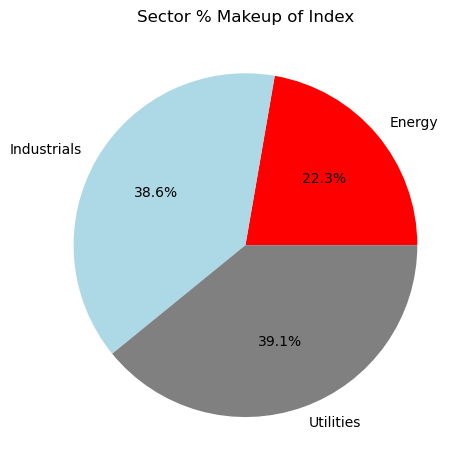

In [116]:
plt.pie(sector_distribution, labels=sector_distribution.index, colors=['red', 'lightblue', 'gray'], autopct='%1.1f%%')
plt.title('Sector % Makeup of Index')
plt.tight_layout()

plt.savefig('./output_files/sector_market_value.png')